In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import warnings
# 警告メッセージを非表示にする
warnings.filterwarnings("ignore")


# データの読み込み
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')
venue_data = pd.read_csv('../data/venue_information.csv')
holidays_in_japan_data = pd.read_csv('../data/holidays_in_japan.csv')
match_reports_data = pd.read_csv('../data/match_reports.csv')

# データの結合
all_data = pd.concat([train_data, test_data], ignore_index=True)

In [5]:
# all_dataの表示
all_data.head()

# 基本統計情報の取得
describe_data = all_data.describe(include='all')
info_data = all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3825 non-null   int64  
 1   match_date     3825 non-null   object 
 2   kick_off_time  3825 non-null   object 
 3   section        3825 non-null   object 
 4   round          3825 non-null   object 
 5   home_team      3825 non-null   object 
 6   away_team      3825 non-null   object 
 7   venue          3825 non-null   object 
 8   weather        3825 non-null   object 
 9   temperature    3825 non-null   float64
 10  humidity       3825 non-null   float64
 11  broadcasters   3825 non-null   object 
 12  attendance     3366 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 388.6+ KB


In [6]:
# 欠損値の確認
missing_values = all_data.isnull().sum()
print("Missing Values:")
print(missing_values)



Missing Values:
id                 0
match_date         0
kick_off_time      0
section            0
round              0
home_team          0
away_team          0
venue              0
weather            0
temperature        0
humidity           0
broadcasters       0
attendance       459
dtype: int64


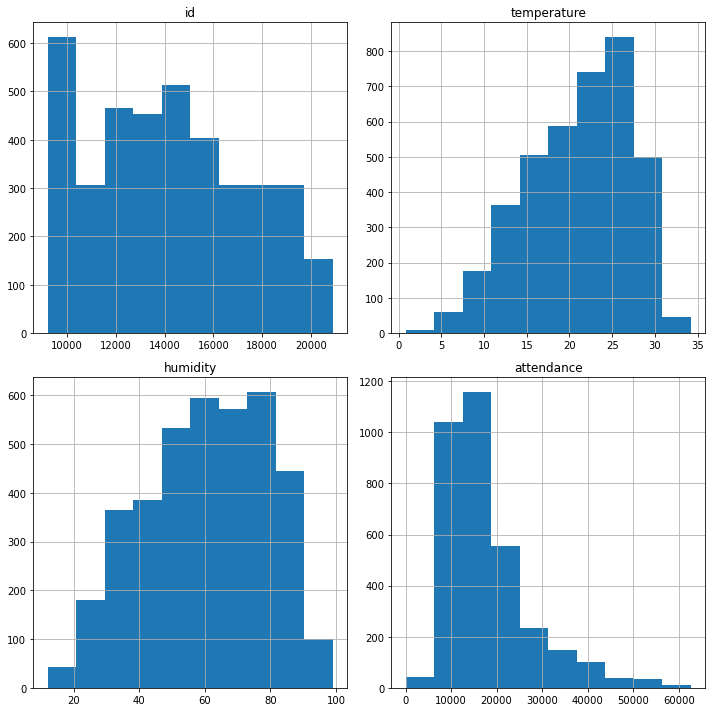

In [7]:
# ヒストグラムの作成
all_data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()



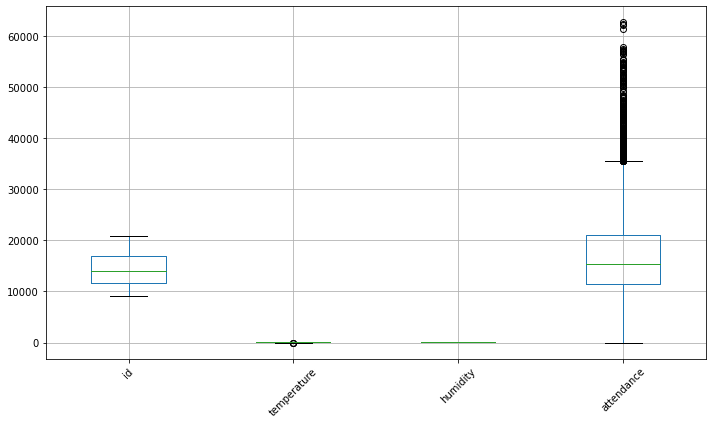

In [8]:
# ボックスプロットの作成
all_data.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

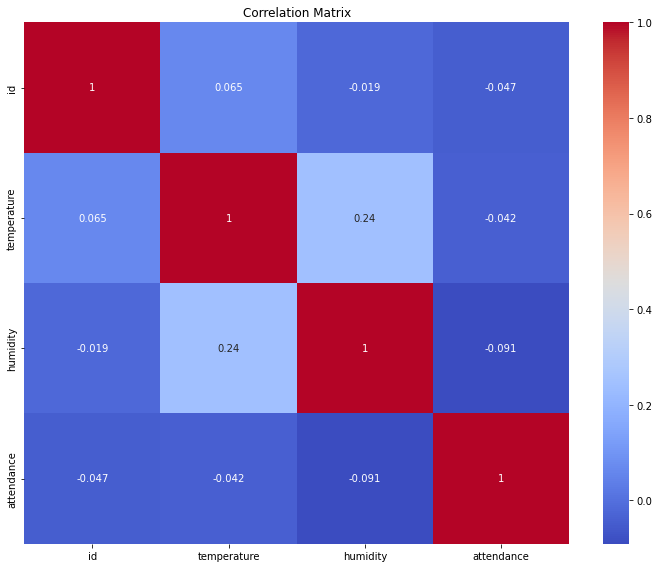

In [9]:
# ヒートマップの作成
correlation_matrix = all_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

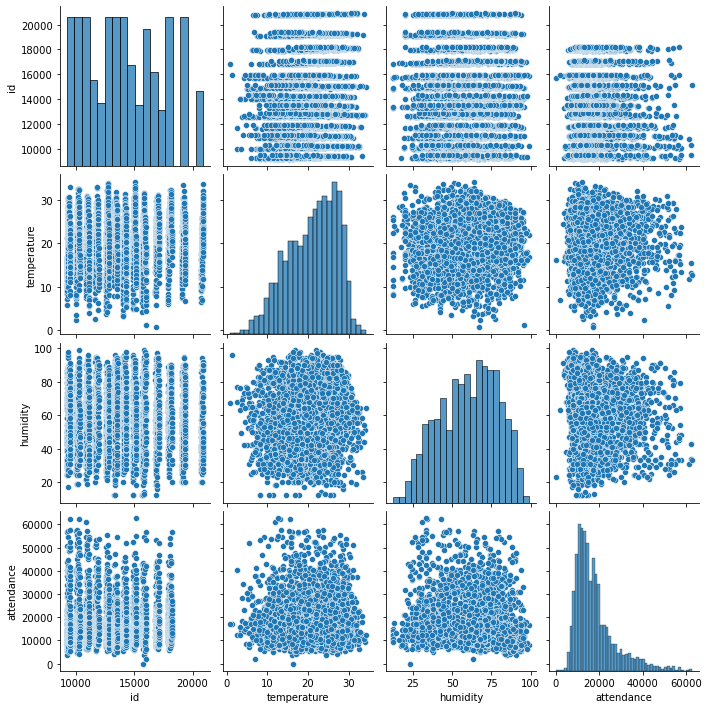

In [10]:
# データに含まれる全ての数値変数同士での散布図を描画(NaN値がある場合はエラー)
sns.pairplot(all_data)

In [11]:
# カテゴリ変数の一意な値と出現回数を表示する
categorical_columns = ['section','round', 'home_team','away_team','venue', 'weather', 'broadcasters']
for col in categorical_columns:
    unique_values = all_data[col].unique()
    value_counts = all_data[col].value_counts()
    
    print(f'Column: {col}', len(unique_values),'個')
    print(unique_values)
    # print('Value Counts:')
    # print(value_counts)
    print('------------------------------------------------------------------------------------------------------------------------')

Column: section 34 個
['第1節' '第2節' '第3節' '第4節' '第5節' '第6節' '第7節' '第8節' '第9節' '第10節' '第11節'
 '第12節' '第13節' '第14節' '第15節' '第16節' '第17節' '第18節' '第19節' '第20節' '第21節'
 '第22節' '第23節' '第24節' '第25節' '第26節' '第27節' '第28節' '第29節' '第30節' '第31節'
 '第32節' '第33節' '第34節']
------------------------------------------------------------------------------------------------------------------------
Column: round 4 個
['第1日' '第2日' '第3日' '第4日']
------------------------------------------------------------------------------------------------------------------------
Column: home_team 30 個
['G大阪' '甲府' 'FC東京' '磐田' '名古屋' '大宮' '川崎F' '広島' '横浜FM' '浦和' '千葉' '新潟' '清水'
 '鹿島' '京都' '福岡' '大分' 'C大阪' '柏' '横浜FC' '神戸' '札幌' '東京V' '山形' '湘南' '仙台' '鳥栖'
 '徳島' '松本' '長崎']
------------------------------------------------------------------------------------------------------------------------
Column: away_team 30 個
['浦和' '清水' '大分' '福岡' 'C大阪' '千葉' '新潟' '鹿島' '京都' '磐田' '甲府' 'FC東京' '名古屋'
 '横浜FM' '川崎F' '大宮' '広島' 'G大阪' '神戸' '横浜FC' '柏' '札幌' '東京V' '

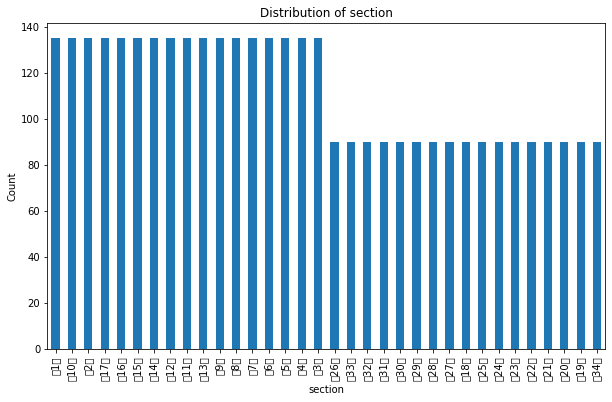

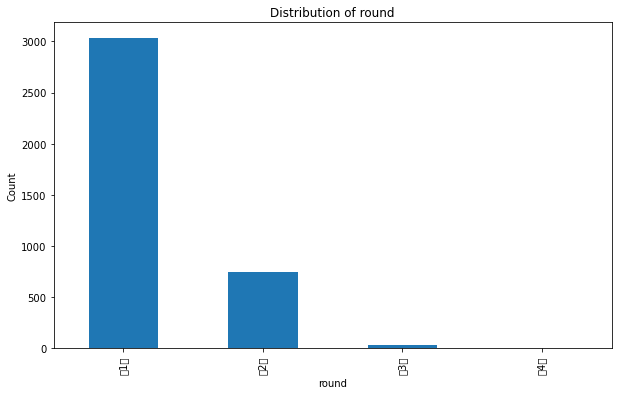

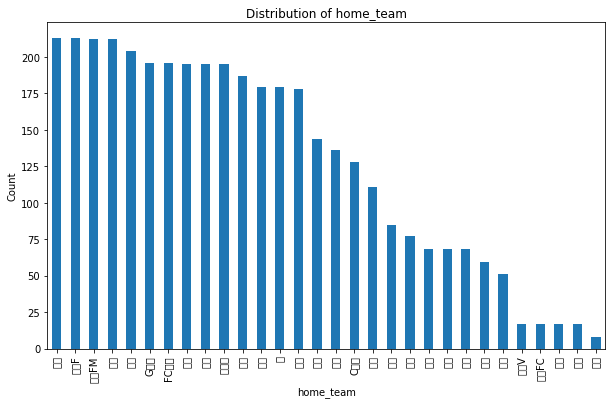

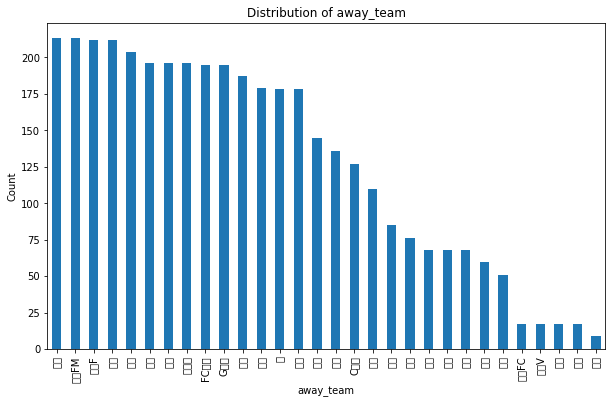

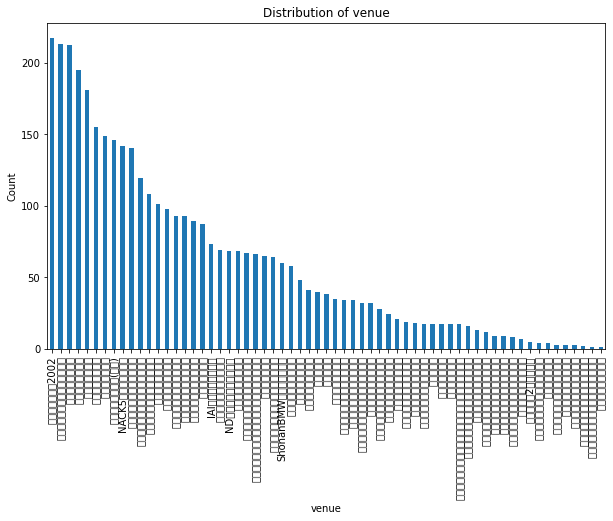

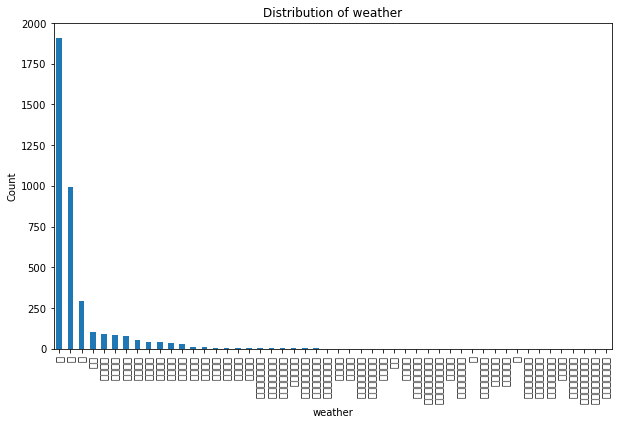

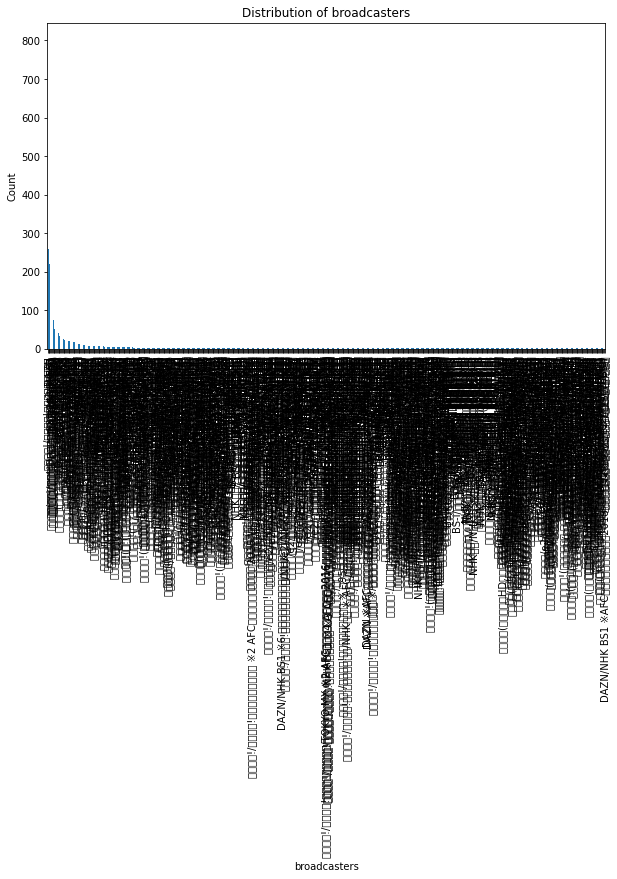

In [12]:
# カテゴリ変数の分布を可視化する
categorical_columns = ['section','round', 'home_team','away_team','venue', 'weather', 'broadcasters']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    all_data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()



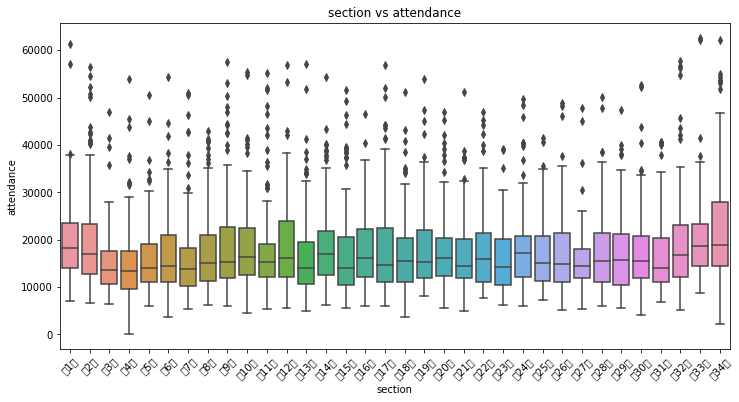

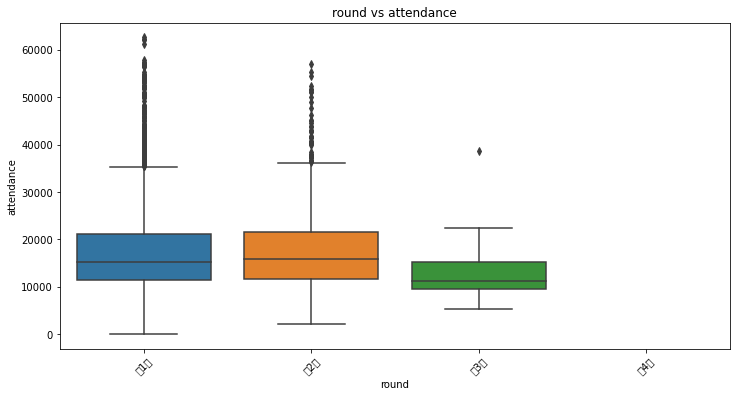

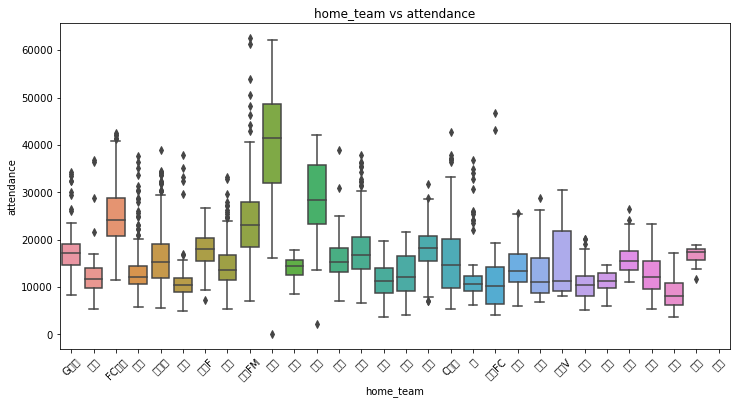

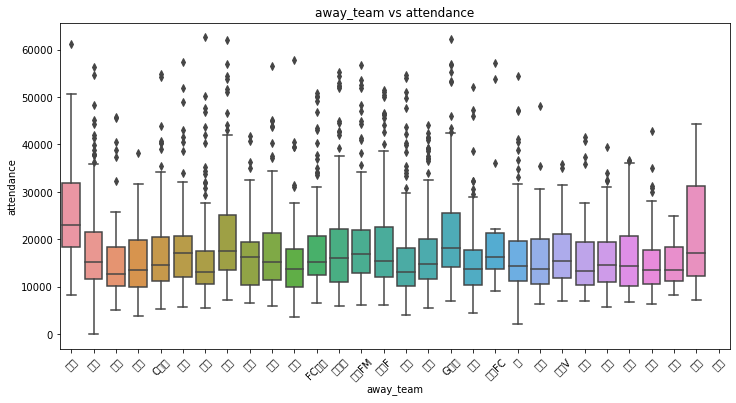

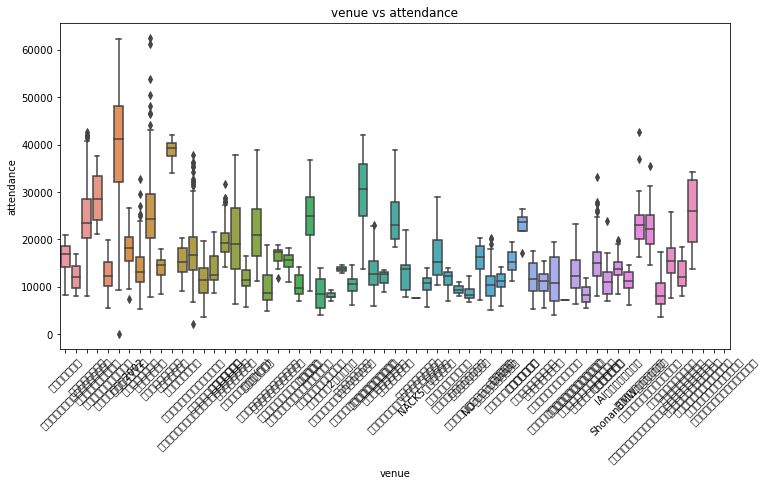

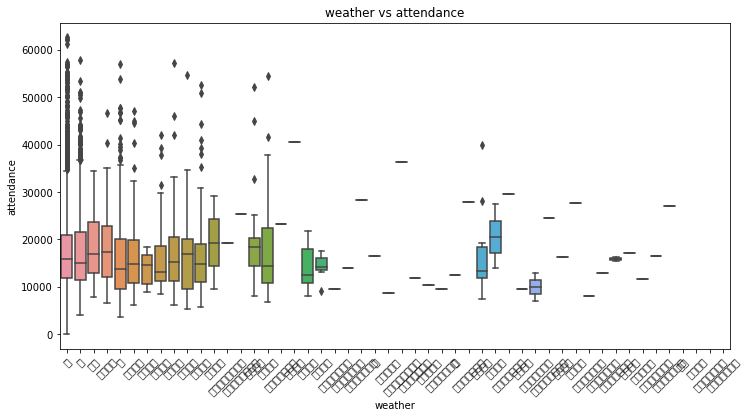

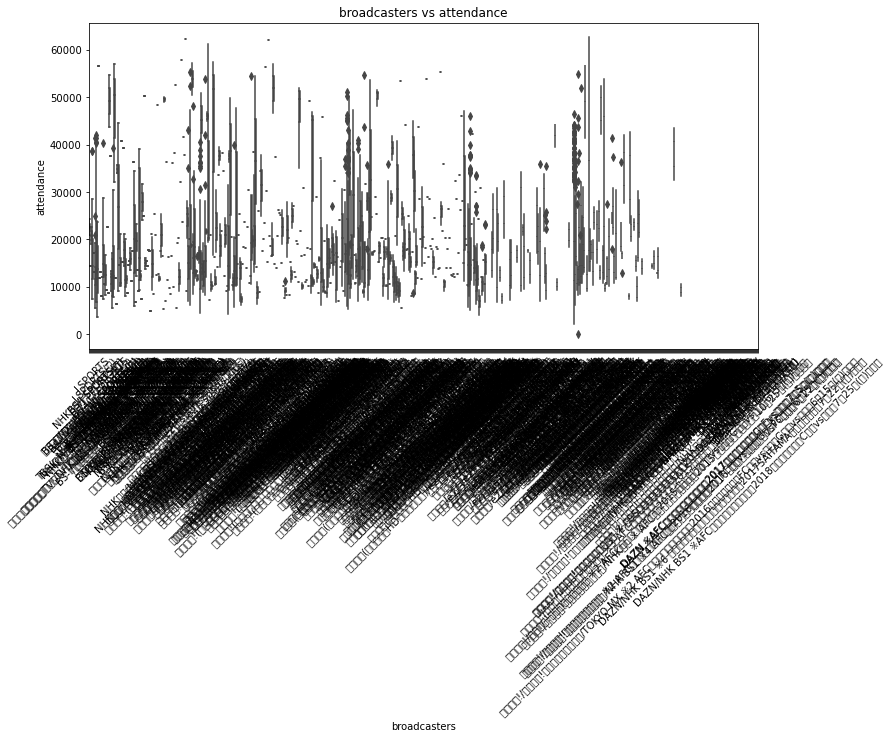

In [13]:
# カテゴリ変数と目的変数の関係を確認する
categorical_columns = ['section','round', 'home_team','away_team','venue', 'weather', 'broadcasters']
target_column = 'attendance'
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y=target_column, data=all_data)
    plt.title(f'{col} vs {target_column}')
    plt.xlabel(col)
    plt.ylabel(target_column)
    plt.xticks(rotation=45)
    plt.show()